<a href="https://colab.research.google.com/github/luciapapalini/transformers-hands-on/blob/main/transformers-intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 TRANSFORMERS ENCODER INTRO Hands-on (30 minutes)

Welcome! In this short interactive session, we’ll explore the basics of **embedding** and **attention**, that are the core elements of every Transformer model. Since Transformers were born as translation models, I think that starting from understanding their functioning with ***text*** and ***languages*** makes them more intuitive.

Since we have 30 mins we are going to focus on the Encoder part of the model.

🎯 **Goal**: Get an intuitive idea of what a Transformer Encoder does.


If it's the first time running this notebook uncomment the following line:

In [ ]:
#!pip install numpy==1.26.4 --force-reinstall. # fix numpy to a version compatible with torch

# 1. EMBEDDING

Embedding is an essential part of Transformers model. It is the first stage data encounter in the algorithm. The goal of this part is to "translate" the input data in the so-called embedding space, which is a high-dimensional space where the Transformer core part works.

Typically, the input is chunked in "tokens" that are subparts of the input serie.

At first, we are using the module **[Embedding](https://)** from the torch library that creates custom random embeddings. It creates a basic look-up table that holds embeddings for a predefined set of items with fixed dimensions.

This module is commonly used to manage word embeddings, allowing you to retrieve them based on index values. It takes a list of indices as input and returns the corresponding embeddings.

    torch.nn.Embedding(num_embeddings, embedding_dim, padding_idx=None, max_norm=None, norm_type=2.0, scale_grad_by_freq=False, sparse=False, _weight=None, _freeze=False, device=None, dtype=None)

First two parameters:

    num_embeddings (int) – size of the dictionary of embeddings
    embedding_dim (int) – the size of each embedding vector

Let's analyze the sentence:

*Sarah carried a light bad walking under the light*

In [6]:
import torch
import torch.nn as nn

⚠️ Typically in language models tokens are parts of words, like:

    Transformers ---> Tra-ns-form-er-s

But for the purpose of this tutorial and for some simpler approches let's assume tokens = words, and let's split our sentences in separate words.


In [14]:
# let's pretend our vocabulary is just made of the few words we need + others for fun
vocab = ['sarah', 'carried', 'a', 'light', 'bag', 'walking', 'under', 'the', 'chocolate', 'travel', 'cat']
word2idx = {word: idx for idx, word in enumerate(vocab)}  # a dictionary words --> index (in the vocabulary)
idx2word = {idx: word for word, idx in word2idx.items()}  # a dictionary index --> word

sentence = "sarah carried a light bag walking under the light"  # 9 words = sequence length

# let's create tokens out of our sentence
tokens = sentence.lower().split()
token_ids = [word2idx[word] for word in tokens]
input_tensor = torch.tensor(token_ids)  # shape: (seq_len,)

We need to fix an important parameter: the **embedding dimension** (or dimension od the model, **d_model**).
This parameter tells us how many dimension the embedding space is going to have, more dimensions --> more expressive model, more information stored for each token

In [15]:
d_model = 8

# let's initialize our Embedding layer
embedding = nn.Embedding(num_embeddings=len(vocab), embedding_dim=d_model)

# and then let's create embed our input data
embedded = embedding(input_tensor)  # shape: (seq_len, embed_dim)
print(embedded.shape)

torch.Size([9, 8])


In [17]:
# let's see how the embeddings look like

for word in tokens:
    idx = word2idx[word]
    emb_vector = embedding(torch.tensor(idx))
    print(f"{word} --> {emb_vector.detach()}")

sarah --> tensor([ 0.9296,  0.6312,  0.6593,  0.5755,  1.5138, -0.4488, -0.5280,  0.2110])
carried --> tensor([-0.8138,  0.0296, -0.6860, -0.4908,  1.0213,  0.2254, -0.3384, -0.8303])
a --> tensor([-0.1105,  0.4518, -0.4114,  0.3935, -0.1151,  0.6591,  0.9486, -0.9950])
light --> tensor([ 0.1813,  0.5780,  1.7569, -1.2549,  0.2637, -0.5807, -0.9212, -1.3072])
bag --> tensor([-0.1410, -0.5473,  0.9929,  1.3588,  1.6739, -0.9868,  0.9212, -1.3345])
walking --> tensor([-1.6964,  0.9183, -1.0579, -0.0907, -0.8217, -1.7950,  1.0891,  2.2950])
under --> tensor([-1.3421, -0.1668, -0.1524, -0.5998,  0.6229, -1.4261,  3.0755,  1.0086])
the --> tensor([ 1.6367, -0.8166, -0.3690, -0.2255,  0.0090,  0.8949,  1.3577,  0.4473])
light --> tensor([ 0.1813,  0.5780,  1.7569, -1.2549,  0.2637, -0.5807, -0.9212, -1.3072])


In principle nn.Embedding can be used for a lot

In [18]:
#!pip install torchtext

In [ ]:
import torch
from torchtext.vocab import GloVe

# Load GloVe from torchtext
glove = GloVe(name='6B', dim=50)  # using 50-dimensional GloVe vectors


In [ ]:
# Example sentence
sentence = "Sarah carried a light bag walking under the light"
tokens = sentence.lower().split()

# Extract and print embedding for each word
print("Word → Embedding vector:")
for word in tokens:
    if word in glove.stoi:
        emb = glove[word]
        print(f"{word:>10} → {emb[:5]}")  # first 5 elements to make comparison easier
    else:
        print(f"{word:>10} → [UNK]")

Word → Embedding vector:
     sarah → tensor([-0.4671,  1.6665,  0.1289, -0.1402,  0.4243])
   carried → tensor([ 0.6284, -0.0887,  0.3397, -0.5304,  0.0704])
         a → tensor([ 0.2171,  0.4651, -0.4676,  0.1008,  1.0135])
     light → tensor([ 0.0063,  0.4725, -0.0733, -0.0060,  0.3675])
       bag → tensor([-0.0282, -0.2216,  0.4478, -0.1850,  0.9992])
   walking → tensor([ 0.2787,  0.7067, -0.3070, -0.5401,  0.6306])
     under → tensor([ 0.1372, -0.2950, -0.0592, -0.5924,  0.0230])
       the → tensor([ 0.4180,  0.2497, -0.4124,  0.1217,  0.3453])
     light → tensor([ 0.0063,  0.4725, -0.0733, -0.0060,  0.3675])


‼️‼️‼️

Notice that the word *light* appears twice in this sentence, once in position 3 and once in position 8.

In both the cases it has the same embedding at this stage, but we know that in order to understand the meaning of this sentence that the two words have two main differences:


*   Position in the sentence
*   Meaning of the word (weight of the bag, source of illumination)


How do we express this differences in their embedding?

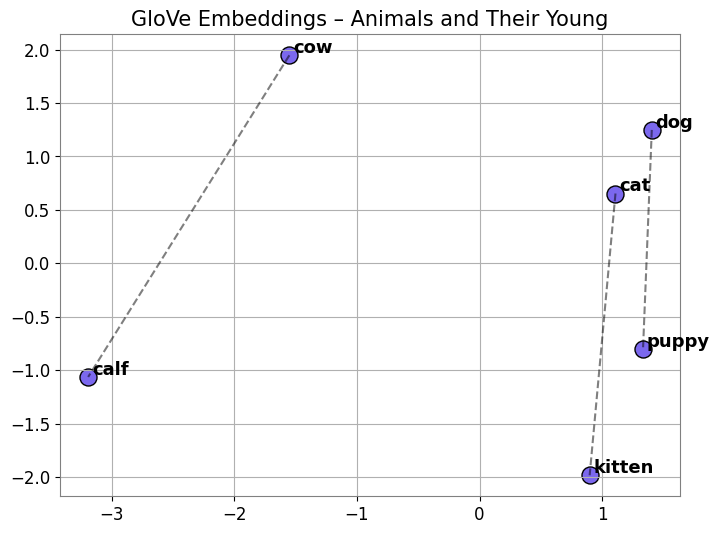

In [ ]:
import torch
from torchtext.vocab import GloVe
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# General plot settings
plt.rcParams.update({
    "font.size": 12,
    "figure.facecolor": "white",
    "axes.edgecolor": "gray",
    "axes.grid": True
})

glove = GloVe(name='6B', dim=50)

# --- Set 1: Animals and their young ---
animal_words = ["dog", "puppy", "cat", "kitten", "cow", "calf"]
animal_pairs = [("dog", "puppy"), ("cat", "kitten"), ("cow", "calf")]

animal_vectors = torch.stack([glove[w] for w in animal_words]).numpy()
pca_animal = PCA(n_components=2).fit_transform(animal_vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(animal_words):
    x, y = pca_animal[i]
    plt.scatter(x, y, color="mediumslateblue", s=150, edgecolors="k")
    plt.text(x + 0.03, y + 0.02, word, fontsize=13, weight='bold')
for a, b in animal_pairs:
    i, j = animal_words.index(a), animal_words.index(b)
    plt.plot([pca_animal[i][0], pca_animal[j][0]], [pca_animal[i][1], pca_animal[j][1]], 'k--', alpha=0.5)
plt.title("GloVe Embeddings – Animals and Their Young", fontsize=15)
plt.show()

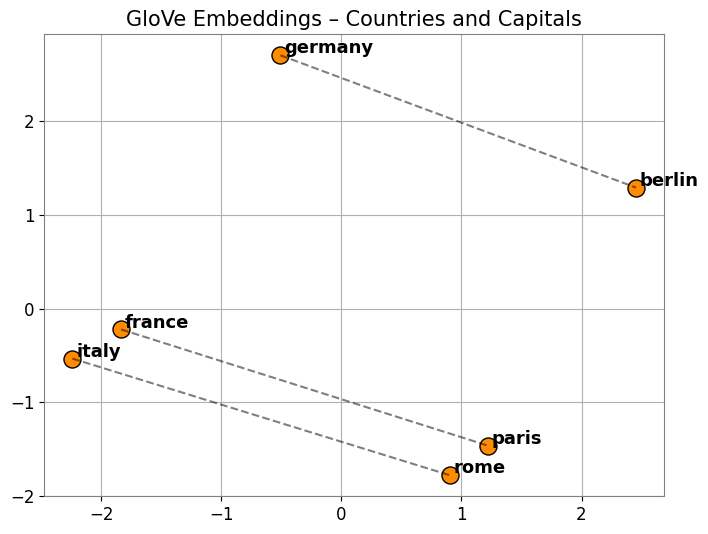

In [ ]:
# --- Set 2: Countries and Capitals ---
geo_words = ["france", "paris", "italy", "rome", "germany", "berlin"]
geo_pairs = [("france", "paris"), ("italy", "rome"), ("germany", "berlin")]

geo_vectors = torch.stack([glove[w] for w in geo_words]).numpy()
pca_geo = PCA(n_components=2).fit_transform(geo_vectors)

plt.figure(figsize=(8, 6))
for i, word in enumerate(geo_words):
    x, y = pca_geo[i]
    plt.scatter(x, y, color="darkorange", s=150, edgecolors="k")
    plt.text(x + 0.03, y + 0.02, word, fontsize=13, weight='bold')
for a, b in geo_pairs:
    i, j = geo_words.index(a), geo_words.index(b)
    plt.plot([pca_geo[i][0], pca_geo[j][0]], [pca_geo[i][1], pca_geo[j][1]], 'k--', alpha=0.5)
plt.title("GloVe Embeddings – Countries and Capitals", fontsize=15)
plt.show()

# POSITIONAL ENCODING

In [ ]:
# Sentence
sentence = "Sarah carried a light bag walking under the light"
tokens = sentence.lower().split()

# GloVe Embedding
embeddings = torch.stack([glove[token] for token in tokens]).numpy()

# Positional Encoding
def positional_encoding(position, d_model):
    angle_rates = 1 / np.power(10000, (2 * (np.arange(d_model) // 2)) / np.float32(d_model))
    angle_rads = np.arange(position)[:, np.newaxis] * angle_rates[np.newaxis, :]
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return angle_rads

pos_enc = positional_encoding(len(tokens), embeddings.shape[1])
embedded_with_pos = embeddings + pos_enc

print(f"{'Word':<10} → {'Embedding[0:5]':<30} \t  → {'+ PosEnc[0:5]'}")
print("-" * 70)
for i, word in enumerate(tokens):
    emb = embeddings[i][:5]
    emb_pos = embedded_with_pos[i][:5]
    print(f"{word:<10} → {np.round(emb, 3)} → {np.round(emb_pos, 3)}")

Word       → Embedding[0:5]                 	  → + PosEnc[0:5]
----------------------------------------------------------------------
sarah      → [-0.467  1.666  0.129 -0.14   0.424] → [-0.467  2.666  0.129  0.86   0.424]
carried    → [ 0.628 -0.089  0.34  -0.53   0.07 ] → [1.47  0.452 0.978 0.24  0.531]
a          → [ 0.217  0.465 -0.468  0.101  1.014] → [1.126 0.049 0.515 0.287 1.831]
light      → [ 0.006  0.472 -0.073 -0.006  0.368] → [ 0.147 -0.518  0.802 -0.49   1.358]
bag        → [-0.028 -0.222  0.448 -0.185  0.999] → [-0.785 -0.875  0.813 -1.116  1.941]
walking    → [ 0.279  0.707 -0.307 -0.54   0.631] → [-0.68   0.99  -0.619 -1.49   1.311]
under      → [ 0.137 -0.295 -0.059 -0.592  0.023] → [-0.142  0.665 -0.906 -1.125  0.29 ]
the        → [ 0.418  0.25  -0.412  0.122  0.345] → [ 1.075  1.004 -1.404  0.252  0.138]
light      → [ 0.006  0.472 -0.073 -0.006  0.368] → [ 0.996  0.327 -0.754  0.727 -0.267]


# ATTENTION

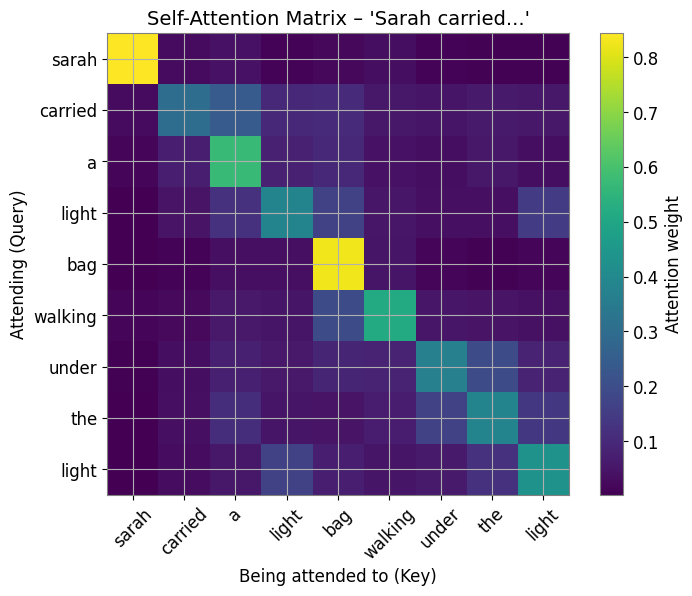

In [ ]:
import torch.nn.functional as F

# 1. Convert to torch tensor
X = torch.tensor(embedded_with_pos, dtype=torch.float32)  # shape: (seq_len, d_model)

# 2. Query, Key, Value = X (simple self-attention)
Q = X
K = X
V = X

# 3. Compute attention weights
d_k = X.shape[1]
scores = Q @ K.T / np.sqrt(d_k)        # shape: (seq_len, seq_len)
attention_weights = F.softmax(scores, dim=-1)  # normalize over rows

# 4. Visualize attention matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(attention_weights.detach().numpy(), cmap='viridis')
plt.xticks(ticks=range(len(tokens)), labels=tokens, rotation=45)
plt.yticks(ticks=range(len(tokens)), labels=tokens)
plt.title("Self-Attention Matrix – 'Sarah carried...'", fontsize=14)
plt.colorbar(label="Attention weight")
plt.xlabel("Being attended to (Key)")
plt.ylabel("Attending (Query)")
plt.show()

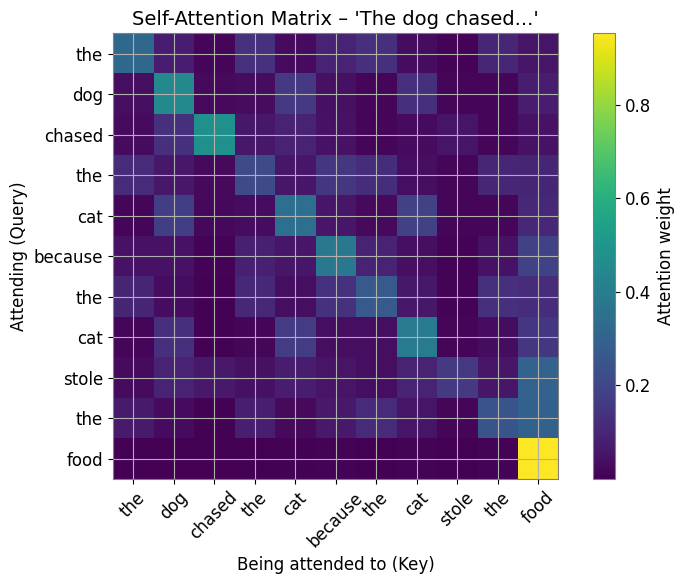

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchtext.vocab import GloVe
import numpy as np

# Load GloVe
glove = GloVe(name='6B', dim=50)

# Sentence
sentence = "The dog chased the cat because the cat stole the food"
tokens = sentence.lower().split()

# GloVe Embedding
embeddings = torch.stack([glove[token] for token in tokens]).numpy()

# Positional Encoding
def positional_encoding(position, d_model):
    angle_rates = 1 / np.power(10000, (2 * (np.arange(d_model)//2)) / np.float32(d_model))
    angle_rads = np.arange(position)[:, np.newaxis] * angle_rates[np.newaxis, :]
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return angle_rads

pos_enc = positional_encoding(len(tokens), embeddings.shape[1])
embedded_with_pos = embeddings + pos_enc

# Self-attention
X = torch.tensor(embedded_with_pos, dtype=torch.float32)
Q = K = V = X
d_k = X.shape[1]
scores = Q @ K.T / np.sqrt(d_k)
attention_weights = F.softmax(scores, dim=-1)

# Visualize attention matrix
plt.figure(figsize=(8, 6))
plt.imshow(attention_weights.detach().numpy(), cmap='viridis')
plt.xticks(ticks=range(len(tokens)), labels=tokens, rotation=45)
plt.yticks(ticks=range(len(tokens)), labels=tokens)
plt.title("Self-Attention Matrix – 'The dog chased...'", fontsize=14)
plt.colorbar(label="Attention weight")
plt.xlabel("Being attended to (Key)")
plt.ylabel("Attending (Query)")
plt.tight_layout()
plt.show()

In [ ]:
# Attention output computation (already done)
attention_output = attention_weights @ V

# Clean comparison printout (first 5 dimensions)
print(f"{'Word':<10} → {'Original[0:5]':<45} → {'AttentionOut[0:5]'}")
print("-" * 100)
for i, word in enumerate(tokens):
    original = embedded_with_pos[i][:5]  # già numpy
    updated = attention_output[i][:5].detach().numpy()  # solo questo è torch
    print(f"{word:<10} → {np.round(original, 4)} → {np.round(updated, 4)}")

Word       → Original[0:5]                                 → AttentionOut[0:5]
----------------------------------------------------------------------------------------------------
the        → [ 0.418   1.2497 -0.4124  1.1217  0.3453] → [ 0.3877  0.2817 -0.3243  0.3118  0.5088]
dog        → [0.9516 0.1525 0.0618 0.4929 1.1658] → [ 0.5865 -0.2028 -0.1826  0.1216  0.8022]
chased     → [ 0.9644 -1.8077  1.9698 -0.3374  1.3874] → [ 0.6725 -1.0483  0.911  -0.1421  1.068 ]
the        → [ 0.5591 -0.7403  0.4629 -0.3618  1.3362] → [ 0.3124 -0.1616 -0.1866 -0.0171  0.5987]
cat        → [-0.304  -1.1547 -0.1715 -0.9465  1.1634] → [ 0.3123 -0.4962 -0.3268 -0.2128  0.6957]
because    → [-0.4299 -0.0178 -0.2561 -1.129   0.8372] → [ 0.0281 -0.2425 -0.2439 -0.3191  0.5194]
the        → [ 0.1386  1.2099 -1.2589 -0.4107  0.6118] → [ 0.2764  0.0915 -0.4981  0.0112  0.4059]
cat        → [ 1.1098  0.2528 -1.5286  0.1144  0.0146] → [ 0.5511 -0.2586 -0.6644  0.0362  0.3426]
stole      → [ 0.7864 -0.6823  0.

In [ ]:
from numpy.linalg import norm

# Compute distances
word_deltas = []
for i, word in enumerate(tokens):
    original = embedded_with_pos[i]
    updated = attention_output[i].detach().numpy()
    distance = norm(updated - original)
    word_deltas.append((word, distance))

# Sort descending
word_deltas.sort(key=lambda x: -x[1])

# Print
print(f"{'Word':<10} → Δ distance (||new - old||)")
print("-" * 45)
for word, dist in word_deltas:
    print(f"{word:<10} → {dist:.4f}")

Word       → Δ distance (||new - old||)
---------------------------------------------
stole      → 3.3657
chased     → 2.5977
the        → 2.3484
the        → 2.3374
because    → 2.1701
the        → 2.1428
the        → 2.0829
cat        → 1.9710
cat        → 1.9131
dog        → 1.8873
food       → 0.2601
